### Flight Price:

#### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
import pandas as pd
df = pd.read_excel('flight_price.xlsx')
print(df.shape)

(10683, 11)


#### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

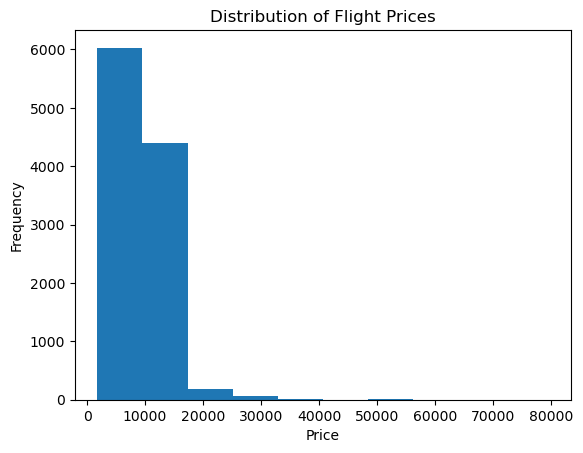

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['Price'])
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [4]:
price_range = df['Price'].max() - df['Price'].min()
min_price = df['Price'].min()
max_price = df['Price'].max()

print("Price Range: ", price_range)
print("Minimum Price: ", min_price)
print("Maximum Price: ", max_price)

Price Range:  77753
Minimum Price:  1759
Maximum Price:  79512


#### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

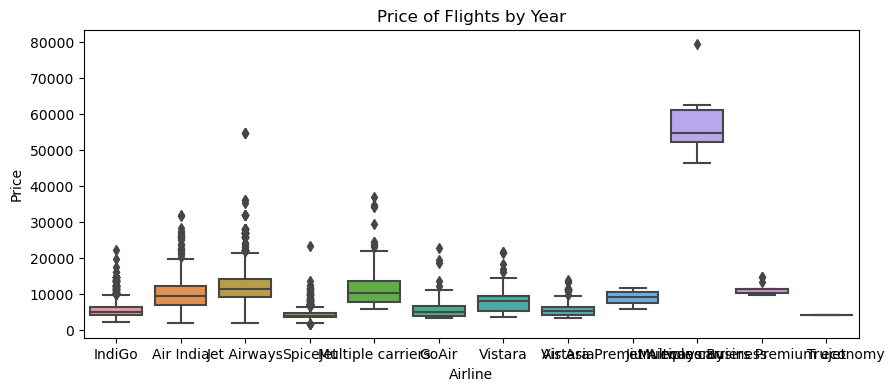

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(x="Airline", y="Price", data=df)
plt.title('Price of Flights by Year')
plt.show()

#### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

Ans: Yes, there are potential outliers in the dataset. The boxplot in the previous question shows that there are several flights with prices above 600 passengers, which could be considered outliers. These outliers may impact the analysis by skewing the mean and standard deviation of flight prices and potentially influencing the results of statistical tests.

#### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

<Axes: xlabel='month', ylabel='Price'>

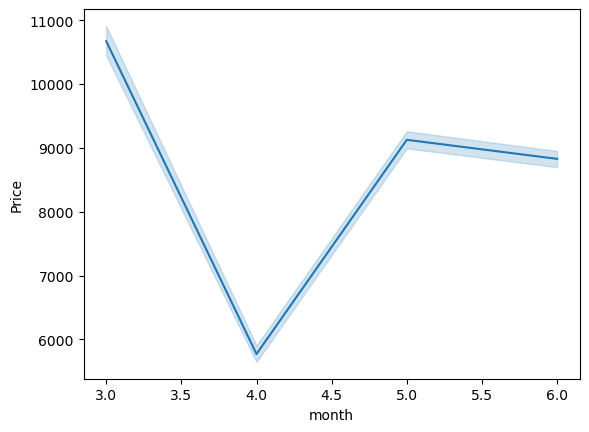

In [7]:
df["month"] = df["Date_of_Journey"].str.split("/").str[1].astype(int)

sns.lineplot(x='month', y='Price', data=df)

#### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


<Axes: xlabel='month', ylabel='Price'>

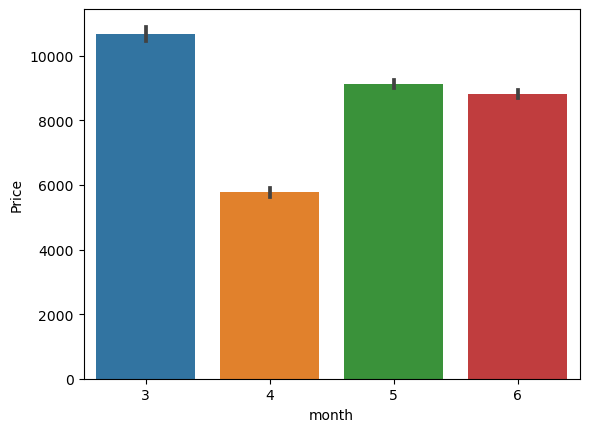

In [9]:
sns.barplot(x='month', y='Price', data=df)

#### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [10]:
df["duration_hours"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]
df["duration_minutes"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [11]:
df["duration_minutes"] = df["duration_minutes"].fillna(20)

In [12]:
df["duration_minutes"] = df["duration_minutes"].astype(int)

In [14]:
df["duration_hours"]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hours, Length: 10683, dtype: object

In [18]:
# Remove non-numeric characters from the "duration_hours" column and convert to numeric
df['duration_hours'] = df['duration_hours'].str.replace('m', '').astype(float)

# Convert the column to integer, ignoring NaN values
df["duration_hours1"] = df["duration_hours"].astype(int, errors='ignore')


In [19]:
df["duration_hours"] = df["duration_hours"].astype(int)

In [20]:
df["duration_hours"].dtype

dtype('int32')

In [21]:
df["duration_minutes"].dtype

dtype('int32')

In [22]:
df["total_duration"] = df["duration_hours"] + df["duration_minutes"]/60

In [23]:
df["total_duration"]

0         2.833333
1         7.416667
2        19.333333
3         5.416667
4         4.750000
           ...    
10678     2.500000
10679     2.583333
10680     3.333333
10681     2.666667
10682     8.333333
Name: total_duration, Length: 10683, dtype: float64

<Axes: xlabel='total_duration', ylabel='Price'>

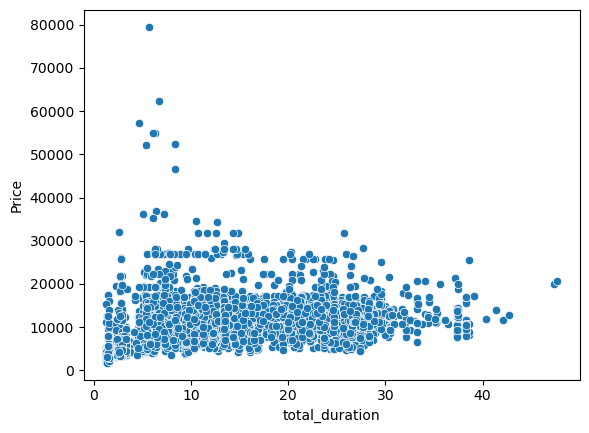

In [24]:
# Ans: 
sns.scatterplot(x='total_duration', y='Price', data=df)

<Axes: >

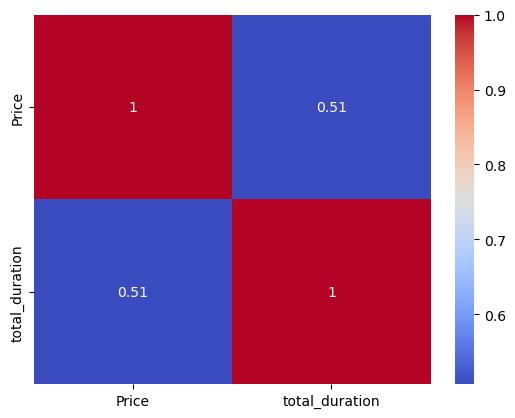

In [26]:
# Exclude non-numeric columns or convert them to numeric
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)


### Google Playstore:

#### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [28]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
print(df.shape)

(10841, 13)


#### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

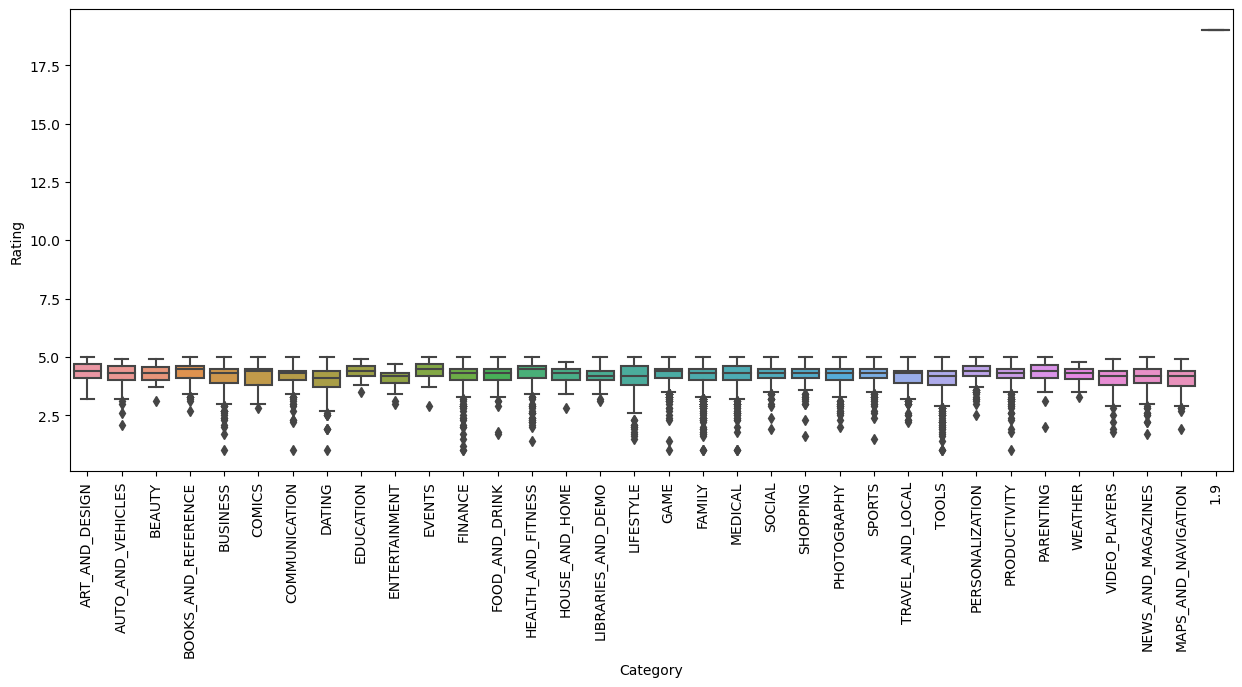

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.boxplot(x="Category", y="Rating", data=df)
plt.xticks(rotation=90)
plt.show()

#### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [30]:
print(df.isnull().sum()) # Yes there are missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

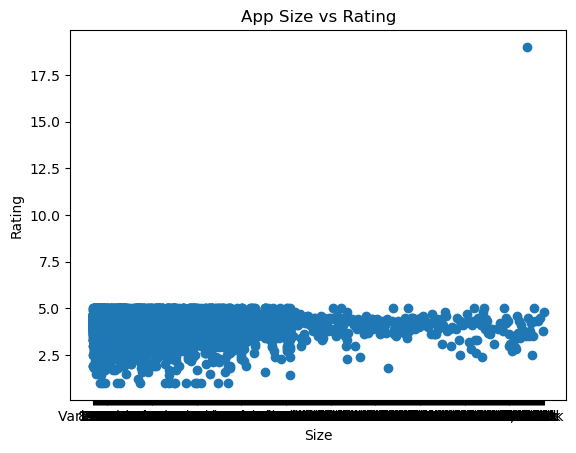

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df['Size'], df['Rating'])
plt.xlabel("Size")
plt.ylabel("Rating")
plt.title("App Size vs Rating")
plt.show()

#### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [32]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [33]:
chars_to_remove = ['+', ',', '$']

cols_to_clean = ['Installs', 'Price']

for items in chars_to_remove:
    for cols in cols_to_clean:
        df[cols] = df[cols].str.replace(items, '')

In [34]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [35]:
df[df['Price'] == 'Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [36]:
df = df.drop(df.index[10472])

In [37]:
df['Price'] = df['Price'].astype(float)

In [38]:
avg_price_by_type = df.groupby('Type')['Price'].mean()

In [39]:
avg_price_by_type

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

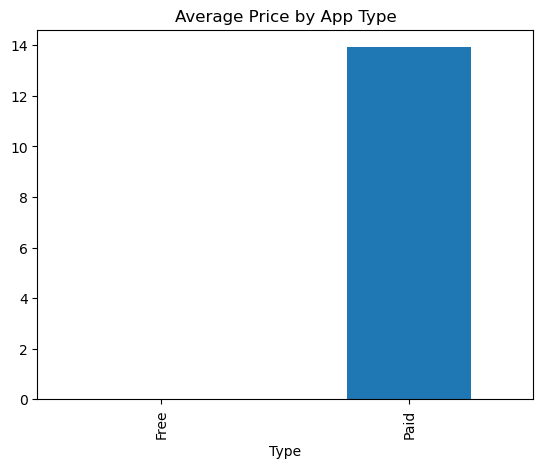

In [40]:
avg_price_by_type.plot(kind='bar')
plt.title('Average Price by App Type')
plt.show()

#### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [41]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

freq_table = pd.DataFrame(df.groupby('App')['Installs'].sum().reset_index())

In [43]:
freq_table_sorted = freq_table.sort_values('Installs', ascending=False)

In [46]:
freq_table_sorted.head(10)

,App,Installs
5806,Life Made WI-Fi Touchscreen Photo Frame,Free
2364,Candy Crush Saga,"500,000,000+500,000,000+500,000,000+500,000,00..."
8304,Temple Run 2,"500,000,000+500,000,000+500,000,000+500,000,00..."
8816,Viber Messenger,"500,000,000+500,000,000+500,000,000+500,000,00..."
7890,Snapchat,"500,000,000+500,000,000+500,000,000+500,000,000+"
9508,imo free video calls and chat,"500,000,000+500,000,000+500,000,000+500,000,000+"
7116,Pou,"500,000,000+500,000,000+500,000,000+500,000,000+"
8673,UC Browser - Fast Download Private & Secure,"500,000,000+500,000,000+500,000,000+"
5672,LINE: Free Calls & Messages,"500,000,000+500,000,000+500,000,000+"
5978,MX Player,"500,000,000+500,000,000+500,000,000+"


In [47]:
freq_table_sorted[1:11]

,App,Installs
2364,Candy Crush Saga,"500,000,000+500,000,000+500,000,000+500,000,00..."
8304,Temple Run 2,"500,000,000+500,000,000+500,000,000+500,000,00..."
8816,Viber Messenger,"500,000,000+500,000,000+500,000,000+500,000,00..."
7890,Snapchat,"500,000,000+500,000,000+500,000,000+500,000,000+"
9508,imo free video calls and chat,"500,000,000+500,000,000+500,000,000+500,000,000+"
7116,Pou,"500,000,000+500,000,000+500,000,000+500,000,000+"
8673,UC Browser - Fast Download Private & Secure,"500,000,000+500,000,000+500,000,000+"
5672,LINE: Free Calls & Messages,"500,000,000+500,000,000+500,000,000+"
5978,MX Player,"500,000,000+500,000,000+500,000,000+"
8645,Twitter,"500,000,000+500,000,000+500,000,000+"


#### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

Ans:
* To identify the most popular app categories on the Google Playstore dataset, I would follow these steps:

    1. Data Cleaning: Clean the data by removing any duplicates, missing values, and incorrect data.

    2. Data Exploration: Explore the data to understand the various features and the relationship between them. Analyze features such as Category, Rating, Reviews, and Installs to identify trends and patterns.

    3. Data Visualization: Visualize the data using various charts and graphs such as bar charts, scatter plots, and histograms to identify correlations and insights.

    4. Statistical Analysis: Perform statistical analysis on the data to identify the most popular app categories based on features such as the average rating, number of installs, and number of reviews.

    5. Machine Learning Models: Develop machine learning models such as classification models to predict the popularity of the app categories based on different features.

----

* Features that I would analyze to make recommendations to the company include:

    1. Category: To identify the most popular app categories.

    2. Rating: To analyze the average rating of apps in each category.

    3. Reviews: To identify the number of reviews of apps in each category.

    4. Installs: To identify the number of installs of apps in each category.

    5. Price: To identify the correlation between the price of apps and their popularity.

By analyzing these features, I can provide the company with recommendations on which app categories to focus on to maximize their chances of success on the Google Playstore.

#### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Ans: 
* To identify the most successful app developers, I would analyze the following features:

    1. Number of apps published by each developer
    
    2. Average rating of each developer's apps
    
    3. Total number of installs for each developer's apps
    
    4. User reviews and feedback for each developer's apps
    
    ----

* To present my findings, I would use data visualizations such as:

    1. Bar charts to compare the number of apps published and the total number of installs for each developer
    
    2. Scatter plots to show the relationship between the average rating and the total number of installs for each developer's apps
    
    3. Heat maps to display user reviews and feedback for each developer's apps, highlighting areas of strength and weakness
    

By analyzing these features and presenting the findings using relevant data visualizations, the mobile app development company can identify the most successful app developers and make informed decisions about partnerships or collaborations.

#### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Ans: To identify the best time to launch a new app, I would analyze the following features:

1. Number of installs per day: Analyzing the trend of the number of installs per day can help identify peak periods of app usage and downloads.

2. Average user rating: Examining the average user rating of apps over time can help identify trends in user satisfaction and preference.

3. Release dates of similar apps: Analyzing the release dates of similar apps can provide insight into when users are more likely to be interested in downloading new apps.

4. User reviews: Analyzing user reviews can provide feedback on the user experience and identify potential issues that need to be addressed.

To present my findings, I would use data visualizations such as line graphs and bar charts to illustrate trends in the number of installs per day, average user rating, and release dates of similar apps. I would also use sentiment analysis to identify trends in user reviews and present them in a word cloud or bar chart.